








# ***Parte 1: Visualización y análisis de datos*** 




**README:** Para el correcto funcionamiento del código y la entrega de los resultados correctos, el codigo debe ser ejecutado desde el principio hasta el final.

In [ ]:
#Importando librerias a utilizar
import cv2
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sb
#Libreria para saber el % de avance de las iteraciones
from tqdm import tqdm
#Para calcular tiempos de entrenamiento
import time

In [ ]:
#Importar datos desde google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**1.** Lectura de datos:

In [ ]:
#Se define la ubicación de los datos:
path = 'drive/My Drive/Inteligencia Computacional/Material_tarea_1_v02/magic04.data'

In [ ]:
#Lectura de datos sin cabecera:
datos=pd.read_csv(path,header=None)
print("Datos sin cabecera")
print(datos)
#Se agrega nombre a las columnas de las features:
datos.set_axis(['fLength', 'fwidth', 'fSize', 'fConc','fconc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist','class'], axis=1, inplace=True)
#Se muestran los datos con cabecera
print("Datos con cabecera")
print(datos)
#Verficiando dimensión de los datos y sus tipos:
print("Dimensión y tipos")
print(len(datos))
print(datos.dtypes)
datos.head()

Datos sin cabecera
             0         1       2       3   ...       7        8         9   10
0       28.7967   16.0021  2.6449  0.3918  ...  -8.2027  40.0920   81.8828   g
1       31.6036   11.7235  2.5185  0.5303  ...  -9.9574   6.3609  205.2610   g
2      162.0520  136.0310  4.0612  0.0374  ... -45.2160  76.9600  256.7880   g
3       23.8172    9.5728  2.3385  0.6147  ...  -7.1513  10.4490  116.7370   g
4       75.1362   30.9205  3.1611  0.3168  ...  21.8393   4.6480  356.4620   g
...         ...       ...     ...     ...  ...      ...      ...       ...  ..
19015   21.3846   10.9170  2.6161  0.5857  ...   2.8766   2.4229  106.8258   h
19016   28.9452    6.7020  2.2672  0.5351  ...  -2.9632  86.7975  247.4560   h
19017   75.4455   47.5305  3.4483  0.1417  ...  -9.4662  30.2987  256.5166   h
19018  120.5135   76.9018  3.9939  0.0944  ... -63.8389  84.6874  408.3166   h
19019  187.1814   53.0014  3.2093  0.2876  ...  31.4755  52.7310  272.3174   h

[19020 rows x 11 columns]
Datos 

,fLength,fwidth,fSize,fConc,fconc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [ ]:
datos

,fLength,fwidth,fSize,fConc,fconc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


**2.** Separación de datos hadrón (h) y no-hadrón (g)

In [ ]:
#Se crean DataFrame vacios, en donde se almacenaran las clases g y h:
datosg = pd.DataFrame(columns=['fLength', 'fwidth', 'fSize', 'fConc','fconc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist','class'])  
datosh= pd.DataFrame(columns=['fLength', 'fwidth', 'fSize', 'fConc','fconc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist','class'])
print("DataFrame datosg")
print(datosg)
print("DataFrame datosh")
print(datosh)  
#Se itera sobre todas las columnas para extraer filas e incorporarlas en el DataFrame correspondiente:
for i in tqdm(range(len(datos))):
  if datos.iloc[(i,10)]=='g':
    datosg.loc[i]=datos.iloc[(i)]
  else:
    datosh.loc[i]=datos.iloc[(i)]
#Se resetean los indices de los DataFrame    
datosg=datosg.reset_index(drop=True)
datosh=datosh.reset_index(drop=True)
print("DataFrame datosg")
print(datosg)
print("DataFrame datosh")
print(datosh)




**3.** Histogramas para cada feature

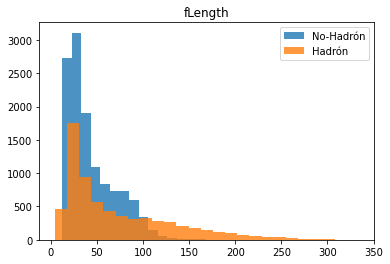

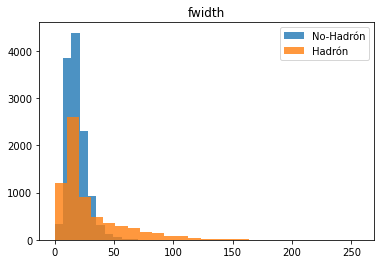

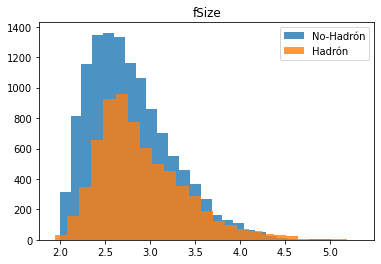

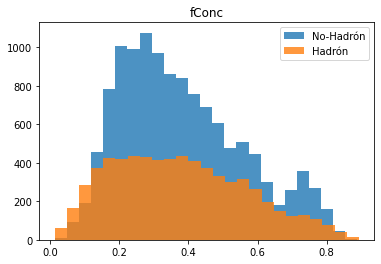

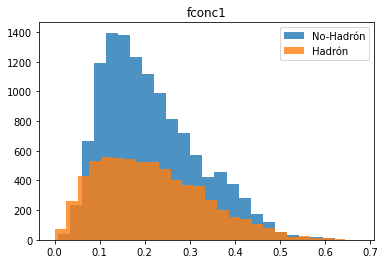

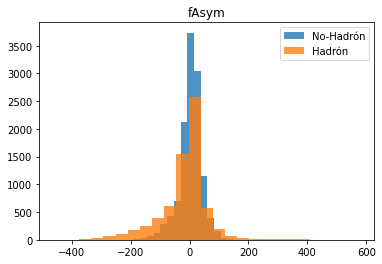

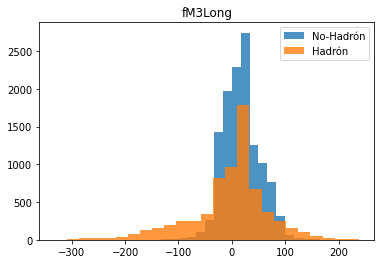

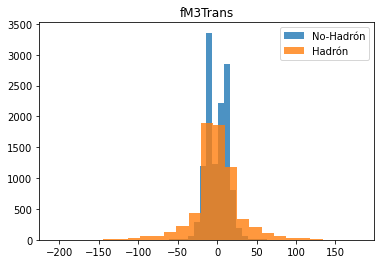

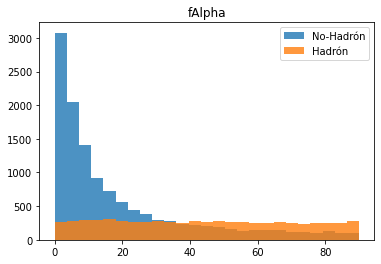

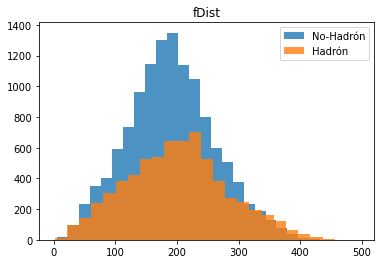

In [ ]:
#Se crea un vector con las features de los datos con el objetivo se usarlo para los titulos de cada histograma:
feature=['fLength', 'fwidth', 'fSize', 'fConc','fconc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist','class']
#Se itera sobre las features X0 hasta X9, graficando sobrepuestas ambas clases:
for i in range(10):
  plt.hist(datosg.iloc[:,i], bins=25,alpha=0.8)
  plt.hist(datosh.iloc[:,i], bins=25, alpha=0.8)
  plt.title(feature[i])
  plt.legend(("No-Hadrón","Hadrón"))
  plt.savefig(feature[i])
  plt.show()
  



**4**. Matrices de correlación entre features

In [ ]:
#Primero se procede reemplazar "g" por 0 y "h" por 1:
datos=datos.replace('g',0)
datos=datos.replace('h', 1) 
#Verificando el correcto reemplazo:
print(datos)
#Se procede a calcular la matrices de correlación en valor absoluto:
print("Matriz de Correlación")
abs(datos.corr())


        fLength    fwidth   fSize   fConc  ...  fM3Trans   fAlpha     fDist  class
0       28.7967   16.0021  2.6449  0.3918  ...   -8.2027  40.0920   81.8828      0
1       31.6036   11.7235  2.5185  0.5303  ...   -9.9574   6.3609  205.2610      0
2      162.0520  136.0310  4.0612  0.0374  ...  -45.2160  76.9600  256.7880      0
3       23.8172    9.5728  2.3385  0.6147  ...   -7.1513  10.4490  116.7370      0
4       75.1362   30.9205  3.1611  0.3168  ...   21.8393   4.6480  356.4620      0
...         ...       ...     ...     ...  ...       ...      ...       ...    ...
19015   21.3846   10.9170  2.6161  0.5857  ...    2.8766   2.4229  106.8258      1
19016   28.9452    6.7020  2.2672  0.5351  ...   -2.9632  86.7975  247.4560      1
19017   75.4455   47.5305  3.4483  0.1417  ...   -9.4662  30.2987  256.5166      1
19018  120.5135   76.9018  3.9939  0.0944  ...  -63.8389  84.6874  408.3166      1
19019  187.1814   53.0014  3.2093  0.2876  ...   31.4755  52.7310  272.3174      1

[19

,fLength,fwidth,fSize,fConc,fconc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
fLength,1.000000,0.770512,0.702454,0.630999,0.598145,0.368556,0.119747,0.013389,0.008777,0.418466,0.307572
fwidth,0.770512,1.000000,0.717517,0.609779,0.581141,0.266961,0.176234,0.039744,0.066061,0.336816,0.265596
fSize,0.702454,0.717517,1.000000,0.850850,0.808835,0.159863,0.095157,0.015455,0.186675,0.437041,0.117795
fConc,0.630999,0.609779,0.850850,1.000000,0.976412,0.112272,0.121899,0.011294,0.235272,0.328332,0.024615
fconc1,0.598145,0.581141,0.808835,0.976412,1.000000,0.100159,0.118769,0.010966,0.229799,0.304625,0.004797
fAsym,0.368556,0.266961,0.159863,0.112272,0.100159,1.000000,0.274045,0.002553,0.055689,0.206730,0.173587
fM3Long,0.119747,0.176234,0.095157,0.121899,0.118769,0.274045,1.000000,0.017197,0.186275,0.037025,0.193409
fM3Trans,0.013389,0.039744,0.015455,0.011294,0.010966,0.002553,0.017197,1.000000,0.004659,0.011427,0.003837
fAlpha,0.008777,0.066061,0.186675,0.235272,0.229799,0.055689,0.186275,0.004659,1.000000,0.220556,0.460979
fDist,0.418466,0.336816,0.437041,0.328332,0.304625,0.206730,0.037025,0.011427,0.220556,1.000000,0.065203


**5**. Indicar por orden cuáles son las características más correlacionadas con la clase:









In [ ]:
#Se ordenan en orden descendente las features correlacionadas con la clase:
a=abs(datos.corr())
a['class'].sort_values(ascending=False)

class       1.000000
fAlpha      0.460979
fLength     0.307572
fwidth      0.265596
fM3Long     0.193409
fAsym       0.173587
fSize       0.117795
fDist       0.065203
fConc       0.024615
fconc1      0.004797
fM3Trans    0.003837
Name: class, dtype: float64

**Respuesta:**
1. fAlpha      
2. fLength     
3. fwidth      
4. fM3Long     
5. fAsym       
6. fSize       
7. fDist       
8. fConc       
9. fconc1      
10. fM3Trans    

**6.** Indicar por orden cuáles son los 5 pares de características más correlacionadas entre sí.


In [ ]:
#Nuevo DataFrame sin columna "class":
datos1=pd.read_csv(path,header=None)
datos1.set_axis(['fLength', 'fwidth', 'fSize', 'fConc','fconc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist','class'], axis=1, inplace=True)
datos1.drop(['class'], axis=1,inplace=True)
print(datos1)

        fLength    fwidth   fSize  ...  fM3Trans   fAlpha     fDist
0       28.7967   16.0021  2.6449  ...   -8.2027  40.0920   81.8828
1       31.6036   11.7235  2.5185  ...   -9.9574   6.3609  205.2610
2      162.0520  136.0310  4.0612  ...  -45.2160  76.9600  256.7880
3       23.8172    9.5728  2.3385  ...   -7.1513  10.4490  116.7370
4       75.1362   30.9205  3.1611  ...   21.8393   4.6480  356.4620
...         ...       ...     ...  ...       ...      ...       ...
19015   21.3846   10.9170  2.6161  ...    2.8766   2.4229  106.8258
19016   28.9452    6.7020  2.2672  ...   -2.9632  86.7975  247.4560
19017   75.4455   47.5305  3.4483  ...   -9.4662  30.2987  256.5166
19018  120.5135   76.9018  3.9939  ...  -63.8389  84.6874  408.3166
19019  187.1814   53.0014  3.2093  ...   31.4755  52.7310  272.3174

[19020 rows x 10 columns]


In [ ]:
# Vector a utilizar para retornar features más y menos correlacionadas entre si:
feature=['fLength', 'fwidth', 'fSize', 'fConc','fconc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist','class']
corr=abs(datos1.corr())
#Matriz de corr a array:
nmp=np.array(corr)

#Corr lo reescribimos como una lista de vectores:
vector=nmp.tolist()

#Concatenamos los vectores contenidos en "vector" en  lista "Z":
Z=[]
for i in range(10):
  Z.extend(vector[i])
print("Dimensión de Z y su contenido")
print(len(Z))
print(Z)

#Reemplazamos 1's de la diagonal por 0 para no interferir en el calculo de máximos:
for i in range(len(Z)):
  if Z[i]==1:
    Z[i]=0
print("Z sin 1's")
print(Z)



Dimensión de Z y su contenido
100
[1.0, 0.7705120396837211, 0.7024537576802136, 0.6309990789441371, 0.5981451310343256, 0.36855648667770613, 0.11974712839849563, 0.013389231720797553, 0.008777491115616104, 0.4184660710290949, 0.7705120396837211, 1.0, 0.7175168553176411, 0.6097786682086167, 0.5811407280368901, 0.2669609165340795, 0.17623422360754665, 0.03974360775459556, 0.06606137710396848, 0.33681611468448225, 0.7024537576802136, 0.7175168553176411, 1.0, 0.8508497973208023, 0.8088350117321321, 0.15986295426380667, 0.09515719422738414, 0.015454743012780273, 0.18667516391283426, 0.43704075700982004, 0.6309990789441371, 0.6097786682086167, 0.8508497973208023, 1.0, 0.9764118508094787, 0.11227222630884263, 0.12189933746198144, 0.011294068519778324, 0.23527190115015098, 0.32833230192791163, 0.5981451310343256, 0.5811407280368901, 0.8088350117321321, 0.9764118508094787, 1.0, 0.10015922010503664, 0.11876890875676853, 0.010965602436160038, 0.2297985354481817, 0.3046246782032224, 0.368556486677

In [ ]:
#Calculo de las 5 primeros máximos dentro del vector Z, con sus respectivas features asociadas:
print("5 features más correlacionadas")
for i in range(5):
  x=max(Z)
  print(x)
  for i in range(len(Z)):
    if Z[i]==x:
      col=i%10
      fil=i//10
      Z[i]=0 #Para "eliminar" este máximo
  print(feature[col],feature[fil])
      

  


5 features más correlacionadas
0.9764118508094787
fConc fconc1
0.8508497973208023
fSize fConc
0.8088350117321321
fSize fconc1
0.7705120396837211
fLength fwidth
0.7175168553176411
fwidth fSize


**Respuesta:**
1. fConc - fconc1 
2. fSize - fConc
3. fSize - fconc1
4. fLength - fwidth
5. fwidth - *fSize*

**7.** Graficar las dos características distintas más correlacionadas en un scatter plot



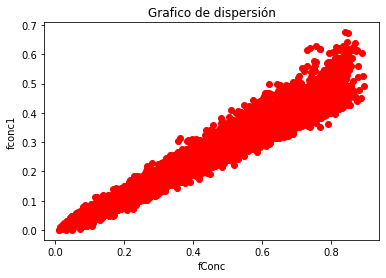

In [ ]:
# Grafico de las 2 features más correlacionadas:
plt.scatter(datos.iloc[:,3], datos.iloc[:,4], marker='o',color = 'red');
plt.xlabel('fConc')
plt.ylabel('fconc1')
plt.title('Grafico de dispersión')
plt.savefig("Dispersion +")
plt.show()

**8.** Indicar por orden cuáles son los 5 pares de características distintas menos correlacionadas entre sí.

 

In [ ]:
#Matriz de corr a array:
corr=abs(datos1.corr())
nmp=np.array(corr)

#Corr lo reescribimos como una lista de vectores:
vector=nmp.tolist()

#Concatenamos los vectores contenidos en "vector" en  lista "Z":
Z=[]
for i in range(10):
  Z.extend(vector[i])
print("Dimensión de Z y su contenido")
print(len(Z))
print(Z)


Dimensión de Z y su contenido
100
[1.0, 0.7705120396837211, 0.7024537576802136, 0.6309990789441371, 0.5981451310343256, 0.36855648667770613, 0.11974712839849563, 0.013389231720797553, 0.008777491115616104, 0.4184660710290949, 0.7705120396837211, 1.0, 0.7175168553176411, 0.6097786682086167, 0.5811407280368901, 0.2669609165340795, 0.17623422360754665, 0.03974360775459556, 0.06606137710396848, 0.33681611468448225, 0.7024537576802136, 0.7175168553176411, 1.0, 0.8508497973208023, 0.8088350117321321, 0.15986295426380667, 0.09515719422738414, 0.015454743012780273, 0.18667516391283426, 0.43704075700982004, 0.6309990789441371, 0.6097786682086167, 0.8508497973208023, 1.0, 0.9764118508094787, 0.11227222630884263, 0.12189933746198144, 0.011294068519778324, 0.23527190115015098, 0.32833230192791163, 0.5981451310343256, 0.5811407280368901, 0.8088350117321321, 0.9764118508094787, 1.0, 0.10015922010503664, 0.11876890875676853, 0.010965602436160038, 0.2297985354481817, 0.3046246782032224, 0.368556486677

In [ ]:
#Calculo de las 5 primeros mínimos dentro del vector Z, con sus respectivas features asociadas:
print("5 features menos correlacionadas")
for i in range(5):
  x=min(Z)
  print(x)
  for i in range(len(Z)):
    if Z[i]==x:
      col=i%10
      fil=i//10
      Z[i]=1 #Para "eliminar" este mínimo
  print(feature[col],feature[fil])
      

5 features menos correlacionadas
0.0025528373198593904
fAsym fM3Trans
0.004659125870348445
fM3Trans fAlpha
0.008777491115616104
fLength fAlpha
0.010965602436160038
fconc1 fM3Trans
0.011294068519778324
fConc fM3Trans


**Respuesta:**

1. fAsym - fM3Trans
2. fM3Trans - fAlpha
3. fLength - fAlpha
4. fconc1 - fM3Trans
5. fConc - fM3Trans


**9.** Graficar las dos características distintas menos correlacionadas en un scatter plot.


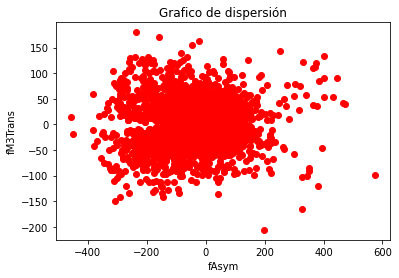

In [ ]:
# Grafico de las 2 features menos correlacionadas:
plt.scatter(datos.iloc[:,5], datos.iloc[:,7], marker='o',color = 'red');
plt.xlabel('fAsym')
plt.ylabel('fM3Trans')
plt.title('Grafico de dispersión')
plt.savefig("Dispersion -")
plt.show()

10. Graficar la matriz de correlación de los datos, usando el valor absoluto de éstas.

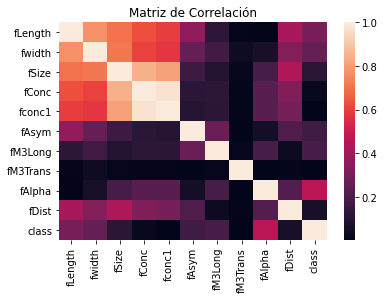

In [ ]:
# Grafico de la matriz de correlación en su valor absoluto
sb.heatmap(abs(datos.corr()))
plt.title("Matriz de Correlación")
plt.savefig("matriz")

# ***Parte 2: Clasificación usando naive Bayes e histogramas***

**11.** Creando matriz de entrenamiento y de prueba





In [ ]:
# 80% de la muestra:
19020*80/100 

15216.0

In [ ]:
 #Proporción clase g/clase h:
 12332/6688 

1.8438995215311005

In [ ]:
#Definimos nuevo DataFrame, "Desorden" con las filas desordenadas de "datos":
Desorden=datos.iloc[np.random.permutation(datos.index)].reset_index(drop=True)
print('Datos Desordenados')
print(Desorden)

#Se define matriz de entrenamiento:
Entrenamiento= Desorden.iloc[0:15216,:].reset_index(drop=True)
print('Datos de Entrenamiento')
print(Entrenamiento)

#Se define matriz de prueba:
prueba=Desorden.iloc[15216:,:].reset_index(drop=True)
print('Datos de Prueba')
print(prueba)

#Se separan los datos de entrenamiento en clase "g" y "h":

#Creación de matrices auxiliares:

datosgentrenamiento = pd.DataFrame(columns=['fLength', 'fwidth', 'fSize', 'fConc','fconc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist','class'])  
datoshentrenamiento= pd.DataFrame(columns=['fLength', 'fwidth', 'fSize', 'fConc','fconc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist','class'])  

#Se itera sobre todas las filas almacenando las filas correspondientes según su clase:
for i in tqdm(range(len(Entrenamiento))):
  if Entrenamiento.iloc[(i,10)]==0:
    datosgentrenamiento.loc[i]=Entrenamiento.iloc[(i)]
  else:
    datoshentrenamiento.loc[i]=Entrenamiento.iloc[(i)]

#Creación de matriz "Ge" y "He" que contienen las clases, las cuales serán usadas posteriormente:
Ge=datosgentrenamiento.reset_index(drop=True)
He=datoshentrenamiento.reset_index(drop=True)

#Se corrige un problema de formato:
Ge['class']=pd.to_numeric(Ge['class'])
He['class']=pd.to_numeric(He['class'])

print('Clase g entrenamiento')
print(Ge)
print('Clase h entrenamiento')
print(He)
print('Verificando proporción g y h, debe ser 1.84 aprox')
print(len(Ge)/len(He)) #Proporción g y h

**12.** Histogramas separados para cada clase

Histogramas clase No-Hadrón


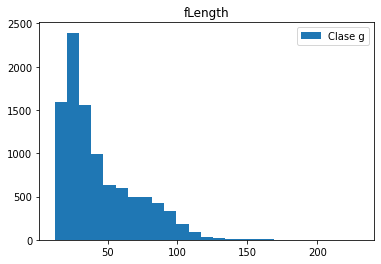

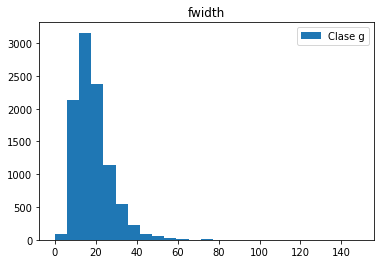

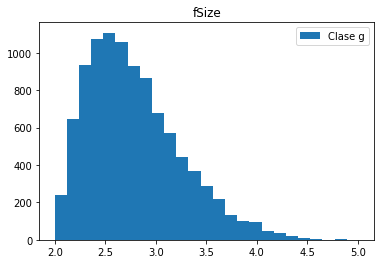

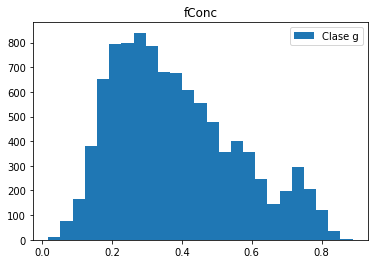

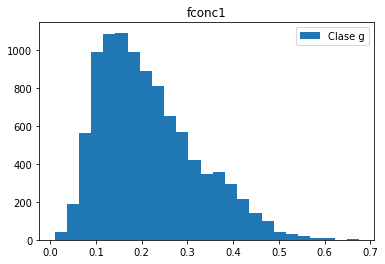

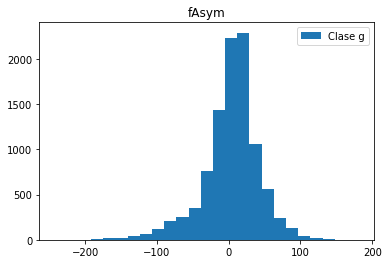

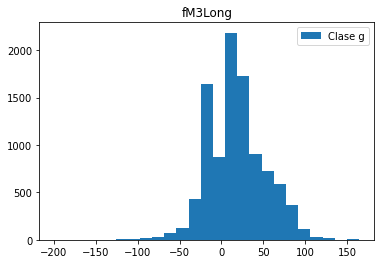

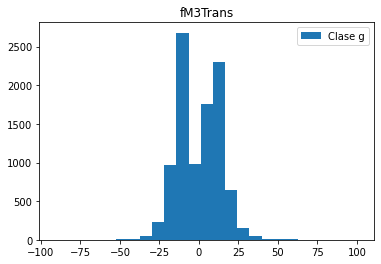

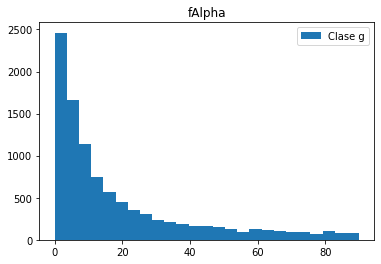

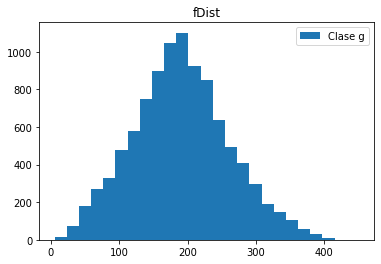

Histogramas clase Hadrón


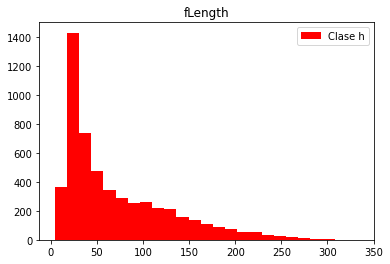

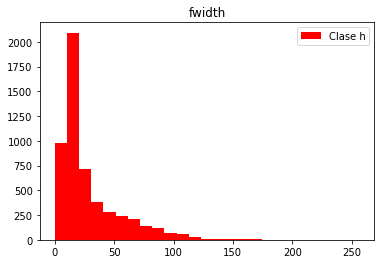

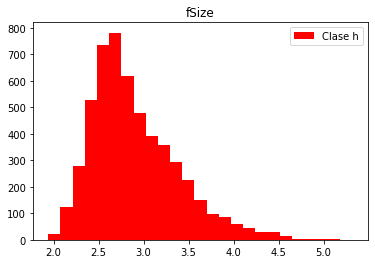

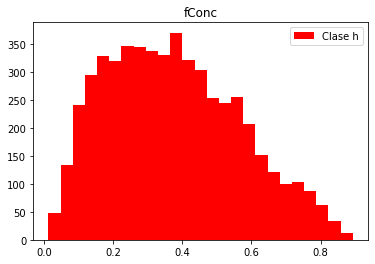

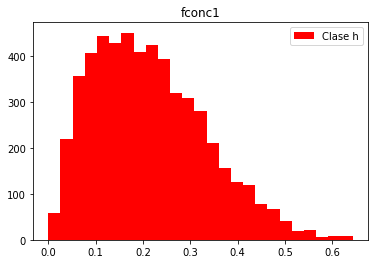

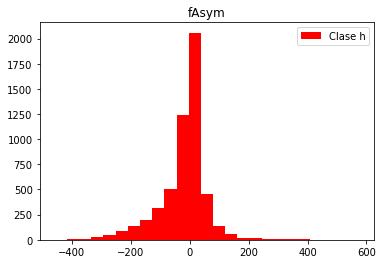

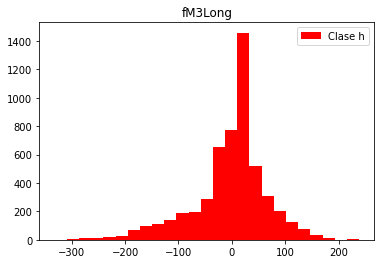

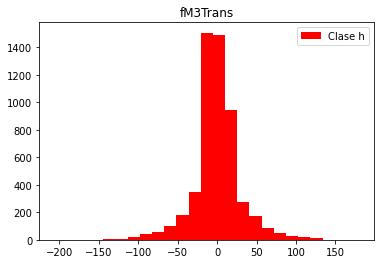

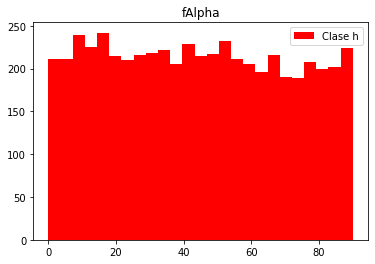

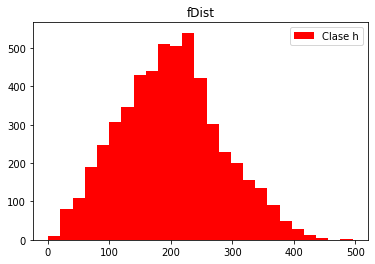

In [ ]:
#Histogramas de cada feature por clase:
feature=['fLength', 'fwidth', 'fSize', 'fConc','fconc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist','class']
print('Histogramas clase No-Hadrón')
for i in range(10):
  plt.hist(Ge.iloc[:,i], bins=25)
  plt.title(feature[i])
  plt.legend(['Clase g'])
  plt.show()
print('Histogramas clase Hadrón')
for i in range(10):
  plt.hist(He.iloc[:,i], bins=25,color='red')
  plt.title(feature[i])
  plt.legend(['Clase h'])
  plt.show()


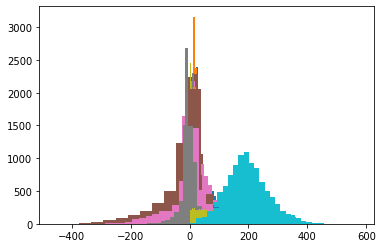

In [ ]:
#Entrenamiento:
#Se procede a guardar Counts y Bins para cada feature de la clase No-Hadrón:
CountsClaseG=[]
BinsClaseG=[]
for i in range(0,10):
  counts, bins, bars=plt.hist(Ge.iloc[:,i], bins=25)
  counts=counts/np.sum(counts)
  CountsClaseG.append(counts)
  BinsClaseG.append(bins)
#Se procede a guardar Counts y Bins para cada feature de la clase Hadrón:
CountsClaseH=[]
BinsClaseH=[]
for i in range(0,10):
  counts, bins, bars=plt.hist(He.iloc[:,i], bins=25)
  counts=counts/np.sum(counts)
  CountsClaseH.append(counts)
  BinsClaseH.append(bins)


**13.** Verosimilitudes en ambas clases usando histogramas.

In [ ]:
#Funciones para calcular la probabilidad de obtener feature xi en la clase correspondiente: 
def verosimilitudG(xi,Columnai): 
  i=Columnai
  #Clase G:
  for j in range(len(CountsClaseG[i])):
    if BinsClaseG[i][j]<=xi and xi<=BinsClaseG[i][j+1]:
      PG=CountsClaseG[i][j]
      break
    else:
      PG=0
  return PG

def verosimilitudH(xi,Columnai):
  i=Columnai
  #Clase H:
  for j in range(len(CountsClaseH[i])):
    if BinsClaseH[i][j]<=xi and xi<=BinsClaseH[i][j+1]:
      PH=CountsClaseH[i][j]
      break
    else:
      PH=0
  return PH




In [ ]:
#Función que multiplica las probabilidades de cada feature de tal modo de obtener la verosimilitud para el caso Hadrón y No-Hadrón:
def ProbabilidadTotal(x0,x1,x2,x3,x4,x5,x6,x7,x8,x9):
  a=[x0,x1,x2,x3,x4,x5,x6,x7,x8,x9]
  B=[]
  C=[]
  #Clase G:
  for i in range(0,10):
    B.append(verosimilitudG(a[i],i))
  PG=B[0]*B[1]*B[2]*B[3]*B[4]*B[5]*B[6]*B[7]*B[8]*B[9]
  #Clase H:
  for i in range(0,10):
    C.append(verosimilitudH(a[i],i))
  PH=C[0]*C[1]*C[2]*C[3]*C[4]*C[5]*C[6]*C[7]*C[8]*C[9]

  return [PG, PH]
    


In [ ]:
#Generamos 2 columnas vacias para ingresas verosimilitudes:
prueba["verosimilitud No-Hadrón"] = ""
prueba["verosimilitud Hadrón"] = ""
print(prueba)

       fLength   fwidth  ...  verosimilitud No-Hadrón  verosimilitud Hadrón
0      35.1147  17.8008  ...                                               
1      66.2943  23.1329  ...                                               
2     138.8380  32.8249  ...                                               
3      43.3510  17.7081  ...                                               
4      19.5014  12.4493  ...                                               
...        ...      ...  ...                      ...                   ...
3799   91.7079  37.8589  ...                                               
3800   21.9678  11.1386  ...                                               
3801   29.5321  13.4738  ...                                               
3802   27.5203  11.1225  ...                                               
3803   22.3636  10.3991  ...                                               

[3804 rows x 13 columns]


In [ ]:
#Calculo de verosimilitud para cada fila de la matriz de prueba:
for i in tqdm(range(len(prueba))):
    y=[]
    for j in range(0,10):
      y.append(prueba.iloc[i,j])
    prueba.iloc[(i,11)]= ProbabilidadTotal(y[0],y[1],y[2],y[3],y[4],y[5],y[6],y[7],y[8],y[9])[0]
    prueba.iloc[(i,12)]= ProbabilidadTotal(y[0],y[1],y[2],y[3],y[4],y[5],y[6],y[7],y[8],y[9])[1]
  
print(prueba)




  0%|          | 0/3804 [00:00<?, ?it/s]


  2%|▏         | 70/3804 [00:00<00:05, 695.48it/s]


  4%|▎         | 134/3804 [00:00<00:05, 674.96it/s]


  5%|▌         | 207/3804 [00:00<00:05, 690.28it/s]


  8%|▊         | 287/3804 [00:00<00:04, 718.94it/s]


  9%|▉         | 353/3804 [00:00<00:04, 698.47it/s]


 11%|█         | 420/3804 [00:00<00:04, 689.00it/s]


 13%|█▎        | 485/3804 [00:00<00:04, 676.11it/s]


 14%|█▍        | 549/3804 [00:00<00:04, 662.29it/s]


 16%|█▌        | 615/3804 [00:00<00:04, 657.31it/s]


 18%|█▊        | 679/3804 [00:01<00:04, 639.86it/s]


 20%|█▉        | 742/3804 [00:01<00:04, 620.76it/s]


 22%|██▏       | 819/3804 [00:01<00:04, 658.30it/s]


 23%|██▎       | 886/3804 [00:01<00:04, 660.27it/s]


 25%|██▌       | 953/3804 [00:01<00:04, 663.10it/s]


 27%|██▋       | 1020/3804 [00:01<00:04, 645.84it/s]


 29%|██▊       | 1085/3804 [00:01<00:04, 636.07it/s]


 30%|███       | 1149/3804 [00:01<00:04, 617.41it/s]


 32%|███▏      | 1212/3804 [00:01<

       fLength   fwidth  ...  verosimilitud No-Hadrón  verosimilitud Hadrón
0      35.1147  17.8008  ...              2.09306e-10           1.00119e-09
1      66.2943  23.1329  ...              4.78286e-10           4.53339e-11
2     138.8380  32.8249  ...              2.36026e-16           1.71943e-13
3      43.3510  17.7081  ...              3.11726e-10           2.24542e-09
4      19.5014  12.4493  ...              3.01338e-10           1.38547e-09
...        ...      ...  ...                      ...                   ...
3799   91.7079  37.8589  ...              9.56082e-13           4.14986e-12
3800   21.9678  11.1386  ...              6.20276e-11           5.87243e-10
3801   29.5321  13.4738  ...              2.62871e-10           1.81717e-09
3802   27.5203  11.1225  ...              2.74106e-10           1.73505e-09
3803   22.3636  10.3991  ...              1.70698e-09             3.852e-10

[3804 rows x 13 columns]


**14.** ) Mover Θ, clasificar el conjunto de prueba y calcular la Tasa de Verdaderos Positivos y Tasa de
Falsos Positivos cada vez para luego generar la curva ROC (TVP vs TFP)

In [ ]:
#Reemplazamos 0's de verosimilitud No-Hadrón por 10^-30 para no generar Nan's al dividir por cero:
prueba["verosimilitud No-Hadrón"].replace(0,10**(-30),inplace=True)

In [ ]:
#Generamos 3 nuevas columnas:
prueba["p(X|Hadron)/p(X|No-Hadron)"] = prueba["verosimilitud Hadrón"]/prueba["verosimilitud No-Hadrón"] #División de verosimilitudes
prueba["clasificación"]="" #Clasificación del detector
prueba["detección"]="" #Caso según la clasificación, FN, TP etc.


In [ ]:
prueba

,fLength,fwidth,fSize,fConc,fconc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class,verosimilitud No-Hadrón,verosimilitud Hadrón,p(X|Hadron)/p(X|No-Hadron),clasificación,detección
0,35.1147,17.8008,2.9096,0.3842,0.2063,37.0454,35.0040,8.3877,16.6113,142.507,0,2.093057e-10,1.00119e-09,4.78338,,
1,66.2943,23.1329,3.1339,0.2131,0.1128,12.4525,71.7250,14.0150,2.3140,179.632,0,4.782857e-10,4.53339e-11,0.0947842,,
2,138.8380,32.8249,3.2464,0.1713,0.1035,-122.6340,95.0450,-27.8132,3.4990,297.614,0,2.360259e-16,1.71943e-13,728.494,,
3,43.3510,17.7081,2.9287,0.3477,0.2210,37.3736,31.5782,-12.4757,20.6640,140.190,0,3.117255e-10,2.24542e-09,7.2032,,
4,19.5014,12.4493,2.3531,0.5322,0.2993,3.1483,-12.5260,-10.1548,27.6440,214.814,0,3.013382e-10,1.38547e-09,4.59772,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3799,91.7079,37.8589,3.1148,0.2226,0.1263,68.2425,78.7615,-15.9738,3.5523,199.296,1,9.560817e-13,4.14986e-12,4.34049,,
3800,21.9678,11.1386,2.2041,0.5687,0.3344,15.0071,19.0468,3.2381,44.1080,170.345,1,6.202756e-11,5.87243e-10,9.46745,,
3801,29.5321,13.4738,2.5676,0.3978,0.2152,38.6563,13.5948,7.3248,79.3750,196.192,1,2.628706e-10,1.81717e-09,6.91278,,
3802,27.5203,11.1225,2.3598,0.4629,0.2467,19.2496,-17.6584,10.0941,57.6127,151.036,0,2.741059e-10,1.73505e-09,6.32985,,





  0%|          | 0/100 [00:00<?, ?it/s]


  1%|          | 1/100 [00:02<03:29,  2.11s/it]


  2%|▏         | 2/100 [00:04<03:22,  2.07s/it]


  3%|▎         | 3/100 [00:06<03:16,  2.03s/it]


  4%|▍         | 4/100 [00:08<03:17,  2.06s/it]


  5%|▌         | 5/100 [00:10<03:14,  2.05s/it]


  6%|▌         | 6/100 [00:12<03:09,  2.02s/it]


  7%|▋         | 7/100 [00:14<03:04,  1.98s/it]


  8%|▊         | 8/100 [00:16<03:05,  2.01s/it]


  9%|▉         | 9/100 [00:18<03:00,  1.98s/it]


 10%|█         | 10/100 [00:20<03:00,  2.01s/it]


 11%|█         | 11/100 [00:22<02:59,  2.02s/it]


 12%|█▏        | 12/100 [00:24<02:54,  1.98s/it]


 13%|█▎        | 13/100 [00:26<02:52,  1.98s/it]


 14%|█▍        | 14/100 [00:28<02:52,  2.00s/it]


 15%|█▌        | 15/100 [00:30<02:52,  2.03s/it]


 16%|█▌        | 16/100 [00:32<02:48,  2.01s/it]


 17%|█▋        | 17/100 [00:34<02:47,  2.02s/it]


 18%|█▊        | 18/100 [00:36<02:44,  2.01s/it]


 19%|█▉        | 19/100 [00:38<02:43,  2.01s/i

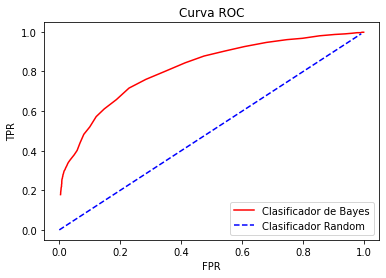

In [ ]:
#Iteración de theta para valores pequeños, en donde se clasifica y se define la detección para cada fila 
#(Cuva ROC incompleta):
FPRv1=[] #Listas vacías que almacenaran cada par (FPR,TPR) para cada valor de theta: 
TPRv1=[]     
for theta in tqdm(np.logspace(-6,6,100)):
  #Se clasifica la fila dado un valor de theta:
  prueba.loc[prueba["p(X|Hadron)/p(X|No-Hadron)"]>theta,["clasificación"]]=1
  prueba.loc[prueba["p(X|Hadron)/p(X|No-Hadron)"]<=theta,["clasificación"]]=0
  #Luego se procede a identificar cada tipo de de detección para cada fila:
  for i in range(len(prueba)):
    if prueba.iloc[i,10]==1 and prueba.iloc[i,14]==1:
       prueba.iloc[i,15]="TP"
    if prueba.iloc[i,10]==0 and prueba.iloc[i,14]==1:
       prueba.iloc[i,15]="FP"
    if prueba.iloc[i,10]==1 and prueba.iloc[i,14]==0:
       prueba.iloc[i,15]="FN"
    if prueba.iloc[i,10]==0 and prueba.iloc[i,14]==0:
       prueba.iloc[i,15]="TN"
  #Para ciertos ordenes del conjunto de prueba (es al azar), se da la posbilidad de que no exista algún
  #"TP", "FP", "FN" o "TN", para evitar ese error, se incorporan a las primeras 4 filas cada tipo de 
  #detección, de modo que siempre se puedan encontrar. 
  #(Notar que estos son despreciables en cuanto a los resultados, dado que es un 1 v/s 3000 datos)
  prueba.iloc[1,15]="TP"
  prueba.iloc[2,15]="FP"
  prueba.iloc[3,15]="FN"
  prueba.iloc[4,15]="TN"
  #DT cuenta la cantidad de "TP","FP","FN" y "TN":
  DT=prueba['detección'].value_counts()
  FPR=DT["FP"]/(DT["FP"] + DT["TN"])
  TPR=DT["TP"]/(DT["TP"] + DT["FN"])
  FPRv1.append(FPR)
  TPRv1.append(TPR)
plt.plot(FPRv1, TPRv1,color = 'red')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Curva ROC')
x=np.arange(0, 1, 0.01)
plt.plot(x,x,"b--")
plt.legend(["Clasificador de Bayes", "Clasificador Random"], loc ="lower right")
plt.show() 




  0%|          | 0/10 [00:00<?, ?it/s]


 10%|█         | 1/10 [00:02<00:18,  2.06s/it]


 20%|██        | 2/10 [00:04<00:16,  2.05s/it]


 30%|███       | 3/10 [00:06<00:14,  2.07s/it]


 40%|████      | 4/10 [00:08<00:12,  2.02s/it]


 50%|█████     | 5/10 [00:10<00:10,  2.00s/it]


 60%|██████    | 6/10 [00:12<00:07,  1.99s/it]


 70%|███████   | 7/10 [00:14<00:06,  2.04s/it]


 80%|████████  | 8/10 [00:15<00:03,  1.97s/it]


 90%|█████████ | 9/10 [00:18<00:02,  2.01s/it]


100%|██████████| 10/10 [00:20<00:00,  2.01s/it]


[0.004060089321965083, 0.0032480714575720666, 0.0032480714575720666, 0.0028420625253755584, 0.00243605359317905, 0.00243605359317905, 0.0020300446609825416, 0.0016240357287860333, 0.0004060089321965083, 0.0004060089321965083]
[0.15361670395227442, 0.1297539149888143, 0.10961968680089486, 0.10067114093959731, 0.0947054436987323, 0.08501118568232663, 0.06562266964951528, 0.041014168530947054, 0.017897091722595078, 0.011185682326621925]


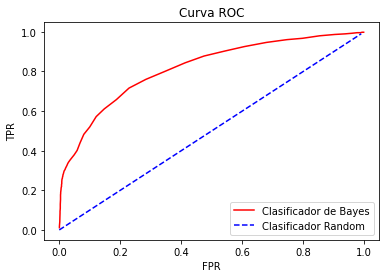

In [ ]:
#Iteración de theta para valores grandes, en donde se clasifica y se define la detección para cada fila (Cuva ROC completa):
FPRv2=[]                   #promedio0*4, promedio0/10
TPRv2=[]
for theta in tqdm(np.logspace(7,18,10)):
  prueba.loc[prueba["p(X|Hadron)/p(X|No-Hadron)"]>theta,["clasificación"]]=1
  prueba.loc[prueba["p(X|Hadron)/p(X|No-Hadron)"]<=theta,["clasificación"]]=0
  for i in range(len(prueba)):
    if prueba.iloc[i,10]==1 and prueba.iloc[i,14]==1:
       prueba.iloc[i,15]="TP"
    if prueba.iloc[i,10]==0 and prueba.iloc[i,14]==1:
       prueba.iloc[i,15]="FP"
    if prueba.iloc[i,10]==1 and prueba.iloc[i,14]==0:
       prueba.iloc[i,15]="FN"
    if prueba.iloc[i,10]==0 and prueba.iloc[i,14]==0:
       prueba.iloc[i,15]="TN"
  prueba.iloc[1,15]="TP"
  prueba.iloc[2,15]="FP"
  prueba.iloc[3,15]="FN"
  prueba.iloc[4,15]="TN"
  DT=prueba['detección'].value_counts()
  FPR=DT["FP"]/(DT["FP"] + DT["TN"])
  TPR=DT["TP"]/(DT["TP"] + DT["FN"])
  FPRv2.append(FPR)
  TPRv2.append(TPR)
print(FPRv2)  
print(TPRv2)
# Concatenación y grafico curva ROC
FPRv1.extend(FPRv2)
TPRv1.extend(TPRv2)
plt.plot(FPRv1, TPRv1,color = 'red')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Curva ROC')
x=np.arange(0, 1, 0.01)
plt.plot(x,x,"b--")
plt.legend(["Clasificador de Bayes", "Clasificador Random"], loc ="lower right")
plt.savefig("ROC1")
plt.show()

**15.**  Genere la curva precisión-recall




  0%|          | 0/100 [00:00<?, ?it/s]


  1%|          | 1/100 [00:02<03:26,  2.08s/it]


  2%|▏         | 2/100 [00:04<03:20,  2.05s/it]


  3%|▎         | 3/100 [00:06<03:19,  2.06s/it]


  4%|▍         | 4/100 [00:08<03:15,  2.03s/it]


  5%|▌         | 5/100 [00:10<03:14,  2.05s/it]


  6%|▌         | 6/100 [00:12<03:13,  2.06s/it]


  7%|▋         | 7/100 [00:14<03:13,  2.08s/it]


  8%|▊         | 8/100 [00:16<03:12,  2.09s/it]


  9%|▉         | 9/100 [00:18<03:11,  2.10s/it]


 10%|█         | 10/100 [00:20<03:09,  2.11s/it]


 11%|█         | 11/100 [00:22<03:05,  2.08s/it]


 12%|█▏        | 12/100 [00:24<02:59,  2.04s/it]


 13%|█▎        | 13/100 [00:26<02:56,  2.02s/it]


 14%|█▍        | 14/100 [00:28<02:56,  2.05s/it]


 15%|█▌        | 15/100 [00:30<02:53,  2.04s/it]


 16%|█▌        | 16/100 [00:32<02:52,  2.05s/it]


 17%|█▋        | 17/100 [00:34<02:49,  2.04s/it]


 18%|█▊        | 18/100 [00:37<02:47,  2.05s/it]


 19%|█▉        | 19/100 [00:39<02:47,  2.07s/i

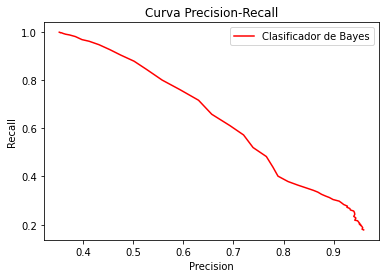

In [ ]:
#Iteración sobre theta para la curva Precision - Recall:
Precisionv1=[]
Recallv1=[]
for theta in tqdm(np.logspace(-6,6,100)):
  prueba.loc[prueba["p(X|Hadron)/p(X|No-Hadron)"]>theta,["clasificación"]]=1
  prueba.loc[prueba["p(X|Hadron)/p(X|No-Hadron)"]<=theta,["clasificación"]]=0
  for i in range(len(prueba)):
    if prueba.iloc[i,10]==1 and prueba.iloc[i,14]==1:
       prueba.iloc[i,15]="TP"
    if prueba.iloc[i,10]==0 and prueba.iloc[i,14]==1:
       prueba.iloc[i,15]="FP"
    if prueba.iloc[i,10]==1 and prueba.iloc[i,14]==0:
       prueba.iloc[i,15]="FN"
    if prueba.iloc[i,10]==0 and prueba.iloc[i,14]==0:
       prueba.iloc[i,15]="TN"
  prueba.iloc[1,15]="TP"
  prueba.iloc[2,15]="FP"
  prueba.iloc[3,15]="FN"
  prueba.iloc[4,15]="TN"
  DT=prueba['detección'].value_counts()
  Precision=DT["TP"]/(DT["TP"] + DT["FP"])
  Recall=DT["TP"]/(DT["TP"] + DT["FN"])
  Precisionv1.append(Precision)
  Recallv1.append(Recall)
plt.plot(Precisionv1,Recallv1,color='red')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Curva Precision-Recall')
plt.legend(['Clasificador de Bayes'],loc ='upper right')
plt.savefig("precision1")
plt.show()  

# ***Parte 3***:  Clasificación usando gaussianas multivariantes

**16.**  Entrenar un modelo gaussiano multidimensional para cada clase, encontrando la media y covarianza, a partir del conjunto de entrenamiento.

In [ ]:
# Eliminamos la columna "class" de los datos de entrenamiento para poder calcular promedios y varianzas:
Ge.drop(['class'], axis=1,inplace=True)
He.drop(['class'], axis=1,inplace=True)
print(Ge)
print(He)

      fLength   fwidth   fSize   fConc  ...  fM3Long  fM3Trans   fAlpha    fDist
0     50.5321  26.6170  3.5064  0.2103  ...  53.0803  -12.8047   3.4310  211.479
1     17.1299  15.2017  2.2577  0.6575  ...  15.1462    7.8090  80.5999  159.324
2     13.2918   9.6037  2.3064  0.8296  ...  -8.8904  -10.9194  77.1591  125.530
3     33.5462  21.3973  3.1052  0.2967  ...  18.2868    9.7640   8.7244  176.299
4     32.2964  17.2756  2.6585  0.3600  ... -21.3147    6.6299  35.1875  192.477
...       ...      ...     ...     ...  ...      ...       ...      ...      ...
9862  67.6373  32.5679  3.4624  0.1662  ...  48.8606   23.5379   1.6460  220.402
9863  29.9259   9.5265  2.4541  0.5448  ...  17.0588   -5.2099   0.2550  218.329
9864  62.4341  40.7553  3.0308  0.1938  ...  52.4417   31.8603  30.6078  328.353
9865  66.2708  21.1399  3.1064  0.2333  ...  60.0875   16.1390   5.9980  307.171
9866  43.7724  20.3530  2.8982  0.2743  ...  38.4208   11.1037  16.2500  273.837

[9867 rows x 10 columns]
  

In [ ]:
# Calculo de promedio y matriz de covarianza clase No-Hadrón:
meang=np.mean(Ge)
covg=np.cov(Ge,rowvar = False)
print("Clase No-Hadrón")
print(meang)
print(covg)
print(covg.shape)

# Calculo de promedio y matriz de covarianza clase Hadrón:
meanh=np.mean(He)
covh=np.cov(He,rowvar = False)
print("Clase Hadrón")
print(meanh)
print(covh)
print(covh.shape)


Clase No-Hadrón
fLength      43.653851
fwidth       18.586782
fSize         2.784515
fConc         0.382905
fconc1        0.214592
fAsym         3.510546
fM3Long      17.703550
fM3Trans      0.224544
fAlpha       18.684161
fDist       190.613593
dtype: float64
[[ 6.76535237e+02  1.61751268e+02  9.21540531e+00 -3.27839264e+00
  -1.87121288e+00 -1.07877256e+02  4.76078227e+02  6.67555009e+00
  -2.51280737e+02  1.10392517e+03]
 [ 1.61751268e+02  7.98818382e+01  3.53631026e+00 -1.21038932e+00
  -6.93803690e-01  2.11677147e+00  1.29833565e+02  6.41862846e+00
  -5.77156409e+01  2.46314347e+02]
 [ 9.21540531e+00  3.53631026e+00  2.13091274e-01 -7.06845046e-02
  -4.03233967e-02  5.84928248e-01  8.50875052e+00  1.75337540e-01
  -4.54574724e+00  1.47737420e+01]
 [-3.27839264e+00 -1.21038932e+00 -7.06845046e-02  3.14720911e-02
   1.84019348e-02 -2.51713364e-01 -2.73401784e+00 -4.90984071e-02
   1.83547020e+00 -4.55215500e+00]
 [-1.87121288e+00 -6.93803690e-01 -4.03233967e-02  1.84019348e-02
   1.

In [ ]:
# Función auxiliar para calcular verosimilitudes:
def VerosimilitudNormal(x, dimx, promedios, cov): # x:array de 10 features, dimx: dim de x, promedios: array de promedios de cada feature, cov: array matriz de cov.
    xm = x - promedios
    return (1. / (np.sqrt((2 * np.pi)**dimx * np.linalg.det(cov))) * 
            np.exp(-np.transpose(xm)@np.linalg.inv(cov)@xm/2))
    
#VerosimilitudNormal clase g:
#VerosimilitudNormal(x, 10, meang, covg)

#VerosimilitudNormal clase h:
#VerosimilitudNormal(x, 10, meanh, covh)

**17.**  Encontrar las verosimilitudes en ambas clases para cada muestra del conjunto de prueba, usando 
las gaussianas.

In [ ]:
#Calculo de verosimilitud para cada fila de la matriz de prueba:
for i in tqdm(range(len(prueba))):
    y=[]
    for j in range(0,10):
      y.append(prueba.iloc[i,j])
    x=np.array(y)
    prueba.iloc[(i,11)]= VerosimilitudNormal(x, 10, meang, covg) 
    prueba.iloc[(i,12)]= VerosimilitudNormal(x, 10, meanh, covh)  




  0%|          | 0/3804 [00:00<?, ?it/s]


  1%|          | 34/3804 [00:00<00:11, 337.92it/s]


  2%|▏         | 71/3804 [00:00<00:10, 346.52it/s]


  3%|▎         | 109/3804 [00:00<00:10, 355.30it/s]


  4%|▍         | 147/3804 [00:00<00:10, 360.66it/s]


  5%|▍         | 178/3804 [00:00<00:10, 340.36it/s]


  6%|▌         | 214/3804 [00:00<00:10, 343.49it/s]


  6%|▋         | 247/3804 [00:00<00:10, 337.66it/s]


  7%|▋         | 280/3804 [00:00<00:10, 334.55it/s]


  8%|▊         | 314/3804 [00:00<00:10, 334.16it/s]


  9%|▉         | 350/3804 [00:01<00:10, 340.70it/s]


 10%|█         | 384/3804 [00:01<00:10, 332.69it/s]


 11%|█         | 418/3804 [00:01<00:10, 333.04it/s]


 12%|█▏        | 451/3804 [00:01<00:10, 329.29it/s]


 13%|█▎        | 484/3804 [00:01<00:10, 328.49it/s]


 14%|█▎        | 517/3804 [00:01<00:10, 320.17it/s]


 15%|█▍        | 552/3804 [00:01<00:09, 328.09it/s]


 15%|█▌        | 587/3804 [00:01<00:09, 332.59it/s]


 16%|█▋        | 622/3804 [00:01<00:09

In [ ]:
prueba

,fLength,fwidth,fSize,fConc,fconc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class,verosimilitud No-Hadrón,verosimilitud Hadrón,p(X|Hadron)/p(X|No-Hadron),clasificación,detección
0,35.1147,17.8008,2.9096,0.3842,0.2063,37.0454,35.0040,8.3877,16.6113,142.507,0,2.912698e-11,9.05966e-14,4.78338,0,TN
1,66.2943,23.1329,3.1339,0.2131,0.1128,12.4525,71.7250,14.0150,2.3140,179.632,0,1.070645e-11,2.62548e-14,0.0947842,0,TP
2,138.8380,32.8249,3.2464,0.1713,0.1035,-122.6340,95.0450,-27.8132,3.4990,297.614,0,8.978537e-19,1.99277e-15,728.494,0,FP
3,43.3510,17.7081,2.9287,0.3477,0.2210,37.3736,31.5782,-12.4757,20.6640,140.190,0,1.336295e-11,7.98796e-14,7.2032,0,FN
4,19.5014,12.4493,2.3531,0.5322,0.2993,3.1483,-12.5260,-10.1548,27.6440,214.814,0,2.497952e-11,1.13114e-13,4.59772,0,TN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3799,91.7079,37.8589,3.1148,0.2226,0.1263,68.2425,78.7615,-15.9738,3.5523,199.296,1,2.469707e-15,1.86029e-14,4.34049,0,FN
3800,21.9678,11.1386,2.2041,0.5687,0.3344,15.0071,19.0468,3.2381,44.1080,170.345,1,1.656387e-11,1.06712e-13,9.46745,0,FN
3801,29.5321,13.4738,2.5676,0.3978,0.2152,38.6563,13.5948,7.3248,79.3750,196.192,1,5.441209e-14,7.57907e-14,6.91278,0,FN
3802,27.5203,11.1225,2.3598,0.4629,0.2467,19.2496,-17.6584,10.0941,57.6127,151.036,0,4.219606e-12,1.01184e-13,6.32985,0,TN


**18.** Mover Θ, clasificar el conjunto de prueba y calcular la Tasa de Verdaderos Positivos y Tasa de 
Falsos Positivos cada vez para luego generar la curva ROC (TVP vs TFP).


In [ ]:
#Prevenimos la aparición de Nan's:
prueba["verosimilitud No-Hadrón"].replace(0,10**(-30),inplace=True)

In [ ]:
#Actualizamos valores:
prueba["p(X|Hadron)/p(X|No-Hadron)"] = prueba["verosimilitud Hadrón"]/prueba["verosimilitud No-Hadrón"]

In [ ]:
mediana1=prueba["p(X|Hadron)/p(X|No-Hadron)"].median()
promedio1=prueba["p(X|Hadron)/p(X|No-Hadron)"].mean()
print(mediana1)
print(promedio1)

0.018419640982803326
1.272735210932376e+258





  0%|          | 0/100 [00:00<?, ?it/s]


  1%|          | 1/100 [00:01<02:59,  1.82s/it]


  2%|▏         | 2/100 [00:03<02:59,  1.83s/it]


  3%|▎         | 3/100 [00:05<03:04,  1.90s/it]


  4%|▍         | 4/100 [00:07<03:02,  1.90s/it]


  5%|▌         | 5/100 [00:09<03:07,  1.98s/it]


  6%|▌         | 6/100 [00:11<03:05,  1.98s/it]


  7%|▋         | 7/100 [00:13<02:59,  1.93s/it]


  8%|▊         | 8/100 [00:15<03:02,  1.99s/it]


  9%|▉         | 9/100 [00:17<03:01,  2.00s/it]


 10%|█         | 10/100 [00:19<03:05,  2.06s/it]


 11%|█         | 11/100 [00:22<03:03,  2.06s/it]


 12%|█▏        | 12/100 [00:24<03:02,  2.08s/it]


 13%|█▎        | 13/100 [00:26<02:58,  2.05s/it]


 14%|█▍        | 14/100 [00:28<02:54,  2.03s/it]


 15%|█▌        | 15/100 [00:30<02:52,  2.02s/it]


 16%|█▌        | 16/100 [00:32<02:47,  1.99s/it]


 17%|█▋        | 17/100 [00:34<02:48,  2.03s/it]


 18%|█▊        | 18/100 [00:36<02:49,  2.07s/it]


 19%|█▉        | 19/100 [00:38<02:46,  2.05s/i

[0.9995939910678034, 0.9995939910678034, 0.9995939910678034, 0.9995939910678034, 0.9995939910678034, 0.9995939910678034, 0.9995939910678034, 0.9995939910678034, 0.9995939910678034, 0.9995939910678034, 0.9995939910678034, 0.9995939910678034, 0.9995939910678034, 0.9995939910678034, 0.9995939910678034, 0.9995939910678034, 0.9995939910678034, 0.999187982135607, 0.999187982135607, 0.9979699553390174, 0.997563946406821, 0.9963459196102314, 0.9910678034916768, 0.9837596427121397, 0.976045473000406, 0.9638652050345108, 0.9419407226958993, 0.9090539991879821, 0.8465286236297198, 0.7559886317498985, 0.6613885505481121, 0.5708485586682907, 0.4831506293138449, 0.42062525375558263, 0.35850588712951686, 0.3110028420625254, 0.2744620381648396, 0.24035728786033292, 0.21680876979293545, 0.19488428745432398, 0.16849370686155096, 0.14738124238733252, 0.1368250101502233, 0.1218026796589525, 0.11368250101502234, 0.09987819732034105, 0.0921640276086074, 0.0832318311002842, 0.07632967925294357, 0.07186358099

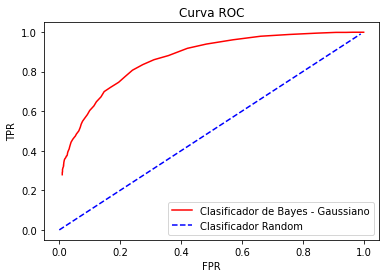

In [ ]:
#Iteración para theta para valores pequeños:
FPRv3=[]
TPRv3=[]  
for theta in tqdm(np.logspace(-6,6,100)):
  prueba.loc[prueba["p(X|Hadron)/p(X|No-Hadron)"]>theta,["clasificación"]]=1
  prueba.loc[prueba["p(X|Hadron)/p(X|No-Hadron)"]<=theta,["clasificación"]]=0
  for i in range(len(prueba)):
    if prueba.iloc[i,10]==1 and prueba.iloc[i,14]==1:
       prueba.iloc[i,15]="TP"
    if prueba.iloc[i,10]==0 and prueba.iloc[i,14]==1:
       prueba.iloc[i,15]="FP"
    if prueba.iloc[i,10]==1 and prueba.iloc[i,14]==0:
       prueba.iloc[i,15]="FN"
    if prueba.iloc[i,10]==0 and prueba.iloc[i,14]==0:
       prueba.iloc[i,15]="TN"
  prueba.iloc[1,15]="TP"
  prueba.iloc[2,15]="FP"
  prueba.iloc[3,15]="FN"
  prueba.iloc[4,15]="TN"
  DT=prueba['detección'].value_counts()
  FPR=DT["FP"]/(DT["FP"] + DT["TN"])
  TPR=DT["TP"]/(DT["TP"] + DT["FN"])
  FPRv3.append(FPR)
  TPRv3.append(TPR)
print(FPRv3)  
print(TPRv3)
plt.plot(FPRv3, TPRv3,color = 'red')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Curva ROC')
x=np.arange(0, 1, 0.01)
plt.plot(x,x,"b--")
plt.legend(["Clasificador de Bayes - Gaussiano", "Clasificador Random"], loc ="lower right")
plt.show()




  0%|          | 0/10 [00:00<?, ?it/s]


 10%|█         | 1/10 [00:01<00:17,  1.95s/it]


 20%|██        | 2/10 [00:03<00:15,  1.96s/it]


 30%|███       | 3/10 [00:05<00:13,  1.97s/it]


 40%|████      | 4/10 [00:07<00:11,  1.98s/it]


 50%|█████     | 5/10 [00:09<00:09,  1.97s/it]


 60%|██████    | 6/10 [00:11<00:07,  1.98s/it]


 70%|███████   | 7/10 [00:13<00:05,  1.99s/it]


 80%|████████  | 8/10 [00:15<00:03,  1.99s/it]


 90%|█████████ | 9/10 [00:17<00:01,  2.00s/it]


100%|██████████| 10/10 [00:19<00:00,  1.97s/it]


[0.0016240357287860333, 0.0008120178643930166, 0.0008120178643930166, 0.0008120178643930166, 0.0008120178643930166, 0.0008120178643930166, 0.0008120178643930166, 0.0008120178643930166, 0.0004060089321965083, 0.0004060089321965083]
[0.049962714392244596, 0.03355704697986577, 0.023117076808351976, 0.014168530947054437, 0.011185682326621925, 0.008948545861297539, 0.00820283370618941, 0.005965697240865026, 0.0037285607755406414, 0.0037285607755406414]


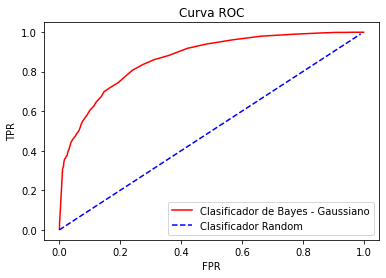

In [ ]:
#Iteración theta para altos valores
FPRv4=[]   
TPRv4=[]
for theta in tqdm(np.logspace(50,200,10)):
  prueba.loc[prueba["p(X|Hadron)/p(X|No-Hadron)"]>theta,["clasificación"]]=1
  prueba.loc[prueba["p(X|Hadron)/p(X|No-Hadron)"]<=theta,["clasificación"]]=0
  for i in range(len(prueba)):
    if prueba.iloc[i,10]==1 and prueba.iloc[i,14]==1:
       prueba.iloc[i,15]="TP"
    if prueba.iloc[i,10]==0 and prueba.iloc[i,14]==1:
       prueba.iloc[i,15]="FP"
    if prueba.iloc[i,10]==1 and prueba.iloc[i,14]==0:
       prueba.iloc[i,15]="FN"
    if prueba.iloc[i,10]==0 and prueba.iloc[i,14]==0:
       prueba.iloc[i,15]="TN"
  prueba.iloc[1,15]="TP"
  prueba.iloc[2,15]="FP"
  prueba.iloc[3,15]="FN"
  prueba.iloc[4,15]="TN"
  DT=prueba['detección'].value_counts()
  FPR=DT["FP"]/(DT["FP"] + DT["TN"])
  TPR=DT["TP"]/(DT["TP"] + DT["FN"])
  FPRv4.append(FPR)
  TPRv4.append(TPR)
print(FPRv4)  
print(TPRv4)
# Concatenación y grafico curva ROC
FPRv3.extend(FPRv4)
TPRv3.extend(TPRv4)
plt.plot(FPRv3, TPRv3,color = 'red')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Curva ROC')
x=np.arange(0, 1, 0.01)
plt.plot(x,x,"b--")
plt.legend(["Clasificador de Bayes - Gaussiano", "Clasificador Random"], loc ="lower right")
plt.savefig('ROC-Gaus')
plt.show()

**19.**  Genere la curva precisión-recall.




  0%|          | 0/100 [00:00<?, ?it/s]


  1%|          | 1/100 [00:01<03:07,  1.89s/it]


  2%|▏         | 2/100 [00:03<03:09,  1.93s/it]


  3%|▎         | 3/100 [00:06<03:11,  1.98s/it]


  4%|▍         | 4/100 [00:08<03:10,  1.99s/it]


  5%|▌         | 5/100 [00:09<03:08,  1.98s/it]


  6%|▌         | 6/100 [00:11<03:01,  1.93s/it]


  7%|▋         | 7/100 [00:13<03:00,  1.94s/it]


  8%|▊         | 8/100 [00:15<02:59,  1.95s/it]


  9%|▉         | 9/100 [00:17<02:56,  1.94s/it]


 10%|█         | 10/100 [00:19<02:59,  1.99s/it]


 11%|█         | 11/100 [00:21<02:59,  2.02s/it]


 12%|█▏        | 12/100 [00:23<02:57,  2.01s/it]


 13%|█▎        | 13/100 [00:25<02:56,  2.03s/it]


 14%|█▍        | 14/100 [00:27<02:51,  2.00s/it]


 15%|█▌        | 15/100 [00:29<02:52,  2.03s/it]


 16%|█▌        | 16/100 [00:31<02:46,  1.98s/it]


 17%|█▋        | 17/100 [00:33<02:44,  1.99s/it]


 18%|█▊        | 18/100 [00:35<02:42,  1.98s/it]


 19%|█▉        | 19/100 [00:37<02:39,  1.97s/i

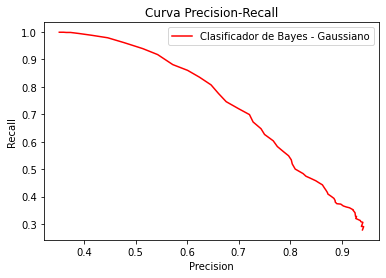

In [ ]:
#Iteración curva precisión 
Precisionv20=[] 
Recallv20=[]
for theta in tqdm(np.logspace(-6,6,100)):
  prueba.loc[prueba["p(X|Hadron)/p(X|No-Hadron)"]>theta,["clasificación"]]=1
  prueba.loc[prueba["p(X|Hadron)/p(X|No-Hadron)"]<=theta,["clasificación"]]=0
  for i in range(len(prueba)):
    if prueba.iloc[i,10]==1 and prueba.iloc[i,14]==1:
       prueba.iloc[i,15]="TP"
    if prueba.iloc[i,10]==0 and prueba.iloc[i,14]==1:
       prueba.iloc[i,15]="FP"
    if prueba.iloc[i,10]==1 and prueba.iloc[i,14]==0:
       prueba.iloc[i,15]="FN"
    if prueba.iloc[i,10]==0 and prueba.iloc[i,14]==0:
       prueba.iloc[i,15]="TN"
  prueba.iloc[1,15]="TP"
  prueba.iloc[2,15]="FP"
  prueba.iloc[3,15]="FN"
  prueba.iloc[4,15]="TN"
  DT=prueba['detección'].value_counts()
  Precision=DT["TP"]/(DT["TP"] + DT["FP"])
  Recall=DT["TP"]/(DT["TP"] + DT["FN"])
  Precisionv20.append(Precision)
  Recallv20.append(Recall)
plt.plot(Precisionv20,Recallv20,color='red')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Curva Precision-Recall')
plt.legend(['Clasificador de Bayes - Gaussiano'],loc ='upper right')
plt.savefig('precision-Gaus')
plt.show()

# ***Parte 4***:  Comparación de resultados

**20.**  Grafique ambas curvas ROC en un único gráfico.

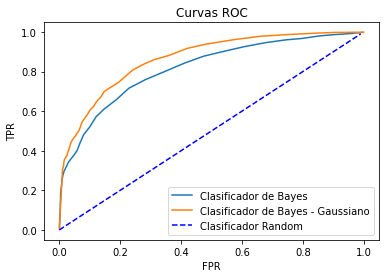

In [ ]:
#Graficos sobrepuestos de curvas ROC  de ambos clasificadores:
plt.plot(FPRv1, TPRv1)
plt.plot(FPRv3, TPRv3)
x=np.arange(0, 1, 0.01)
plt.plot(x,x,"b--")
plt.legend(["Clasificador de Bayes","Clasificador de Bayes - Gaussiano", "Clasificador Random"], loc ="lower right")
plt.title('Curvas ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.savefig('Curvas ROC')
plt.show()

**21.** Grafique ambas curvas precisión-recall en un único gráfico.

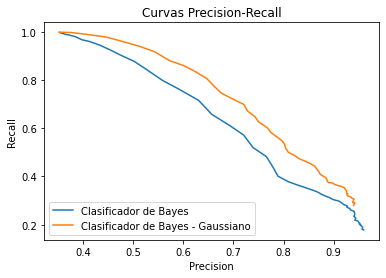

In [ ]:
#Graficos sobrepuestos de curvas precision-recall  de ambos clasificadores:
plt.plot(Precisionv1,Recallv1)
plt.plot(Precisionv20,Recallv20)
plt.legend(["Clasificador de Bayes","Clasificador de Bayes - Gaussiano"], loc ="lower left")
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Curvas Precision-Recall')
plt.savefig('Curvas Precision')
plt.show()

**22.** Compare los tiempos requeridos para entrenar ambos clasificadores.

0.39943528175354004


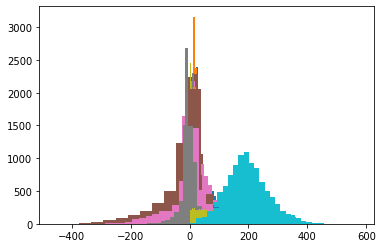

In [ ]:
# Entrenamiento P3:
# Calculo de promedio y matriz de covarianza clase No-Hadrón:
meang=np.mean(Ge)
covg=np.cov(Ge,rowvar = False)

# Calculo de promedio y matriz de covarianza clase Hadrón:
meanh=np.mean(He)
covh=np.cov(He,rowvar = False)

TiempoP3=time.time()

#Entrenamiento P2:
#Se procede a guardar Counts y Bins para cada feature de la clase No-Hadrón:
CountsClaseG=[]
BinsClaseG=[]
for i in range(0,10):
  counts, bins, bars=plt.hist(Ge.iloc[:,i], bins=25)
  counts=counts/np.sum(counts)
  CountsClaseG.append(counts)
  BinsClaseG.append(bins)
#Se procede a guardar Counts y Bins para cada feature de la clase Hadrón:
CountsClaseH=[]
BinsClaseH=[]
for i in range(0,10):
  counts, bins, bars=plt.hist(He.iloc[:,i], bins=25)
  counts=counts/np.sum(counts)
  CountsClaseH.append(counts)
  BinsClaseH.append(bins)

TiempoP2=time.time()

#Para comparar los tiempos de entrenamiento de ambos clasificadores restaremos los tiempos de entrenamiento de la parte 2 con el tiempo de entrenamiento de la parte 3
DeltaT=TiempoP2-TiempoP3
print(DeltaT)